In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    freq = df[column].value_counts()
    frequent_values = freq[freq > min_freq].index
    return df[df[column].isin(frequent_values)]
def create_id_map(sampled_ids):
    sampled_ids = sorted(sampled_ids)
    id_map = {x:i for i,x in enumerate(sampled_ids)}
    return id_map
def print_sample_summary(df):
    n_unique_users = len(set(df['userId']))
    n_unique_items = len(set(df['movieId']))
    n_ratings = len(df)
    print(n_ratings, " ratings, ", n_unique_users, " users, ", n_unique_items, " items")
    print("Sparsity: ", n_ratings/(n_unique_users*n_unique_items))

# Getting all data
users = pd.read_csv('./datasets/ml-20m/ratings.csv')
print_sample_summary(users)
n_runs = 5

20000263  ratings,  138493  users,  26744  items
Sparsity:  0.0053998478135544505


In [3]:
# Filtering out users with <100 ratings --> 51869 users , 26654 items
# Sampling 5000 users from this set randomly
filtered_users = filter_by_freq(users, 'userId', 100)
filtered_users = filter_by_freq(filtered_users, 'movieId', 100)
userIds = list(set(filtered_users['userId'].to_list()))
sampled_users = np.random.choice(userIds, 5000, replace=False)
f_s_users = filtered_users[filtered_users['userId'].isin(sampled_users)]
sampled_uids = list(set(f_s_users['userId']))
sampled_mids = list(set(f_s_users['movieId']))
print_sample_summary(f_s_users)

# save this to diff splits in the datasets directory...
sampled_uids = list(set(f_s_users['userId']))
sampled_mids = list(set(f_s_users['movieId']))

uid_map = create_id_map(sampled_uids)
mid_map = create_id_map(sampled_mids)
f_s_users['uid'] = f_s_users['userId'].map(uid_map)
f_s_users['mid'] = f_s_users['movieId'].map(mid_map)
f_s_users.to_csv('./datasets/ml-20m-uniform/u.data')


for i in range(n_runs):
    X = f_s_users.copy()
    X = X.sample(frac=1)
    uids = X.pop('uid').to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X, uids,stratify=uids, test_size=0.2)
    X_train['uid'] = y_train.values.squeeze()
    X_test['uid'] = y_test.values.squeeze()
    X_train.to_csv('./datasets/ml-20m-uniform/u' + str(i) + '.base')
    X_test.to_csv('./datasets/ml-20m-uniform/u' + str(i) + '.test')

1473914  ratings,  5000  users,  8323  items
Sparsity:  0.035417854139132524


/home/t-sdivya/.conda/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/t-sdivya/.conda/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/t-sdivya/.conda/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [20]:
# Create very small dataset (100 users)

# Sampling dataset
sampled_users = np.random.choice(userIds, 100, replace=False)
tiny_sampled_users = filtered_users[filtered_users['userId'].isin(sampled_users)]
print_sample_summary(tiny_sampled_users)

# Saving splits
sampled_uids = list(set(tiny_sampled_users['userId']))
sampled_mids = list(set(tiny_sampled_users['movieId']))
uid_map = create_id_map(sampled_uids)
mid_map = create_id_map(sampled_mids)
tiny_sampled_users['uid'] = tiny_sampled_users['userId'].map(uid_map)
tiny_sampled_users['mid'] = tiny_sampled_users['movieId'].map(mid_map)
tiny_sampled_users.to_csv('./datasets/ml-20m-tiny/u.data')

for i in range(n_runs):
    X = tiny_sampled_users.copy()
    X = X.sample(frac=1)
    uids = X.copy().pop('uid').to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X, uids,stratify=uids, test_size=0.2)
    X_train['uid'] = y_train.values.squeeze()
    X_test['uid'] = y_test.values.squeeze()
    X_train.to_csv('./datasets/ml-20m-tiny/u' + str(i) + '.base')
    X_test.to_csv('./datasets/ml-20m-tiny/u' + str(i) + '.test')

30930  ratings,  100  users,  5395  items
Sparsity:  0.05733086190917516


/home/t-sdivya/.conda/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/t-sdivya/.conda/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/t-sdivya/.conda/envs/dm/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [21]:
dataset_name = 'ml-20m-tiny'
split_num = 0
ratings = pd.read_csv('datasets/' + dataset_name + '/u.data') 
ratings_matrix = ratings.pivot_table(index=['uid'],columns=['mid'],values='rating').reset_index(drop=True)
ratings_matrix.fillna(0, inplace = True)
data_matrix = np.array(ratings_matrix)

tr_ratings = pd.read_csv('datasets/' + dataset_name + '/u' + str(split_num) + '.base')
test_ratings = pd.read_csv('datasets/' + dataset_name + '/u' + str(split_num) + '.test')
train_idxs = tr_ratings[['uid', 'mid']].values 
test_idxs = test_ratings[['uid', 'mid']].values 
train_idxs = list(map(tuple, train_idxs))
test_idxs = list(map(tuple, test_idxs))

In [22]:
ratings[ratings['uid'] == 50].head(), tr_ratings[tr_ratings['uid'] == 50].head()

(       Unnamed: 0  userId  movieId  rating   timestamp  uid  mid
 16280    11806955   81493        1     4.0  1216180859   50    0
 16281    11806956   81493        2     2.5  1218008716   50    1
 16282    11806957   81493        6     3.5  1215473425   50    5
 16283    11806958   81493       16     5.0  1215472642   50   14
 16284    11806959   81493       25     3.0  1215484476   50   23,
      Unnamed: 0  userId  movieId  rating   timestamp  uid   mid
 77     11807147   81493     2081     3.0  1218008660   50  1396
 251    11807061   81493     1206     4.0  1215472478   50   832
 272    11807470   81493     8981     3.0  1216366850   50  4054
 322    11807084   81493     1283     4.0  1215486541   50   905
 390    11807058   81493     1198     4.5  1215483178   50   825)

In [ ]:
# Sampling the 6000 users and 4000 movies with the highest # of ratings
sampled_uids = users['userId'].value_counts()[:6000].index.to_list()
sampled_mids = users['movieId'].value_counts()[:4000].index.to_list()
sampled_ratings  = users[users['userId'].isin(sampled_uids) & users['movieId'].isin(sampled_mids)]
sampled_ratings.to_csv('./datasets/ml-20m/u.data')
len(set(sampled_ratings['userId'])), len(set(sampled_ratings['movieId']))

In [ ]:
uid_map = create_id_map(sampled_uids)
mid_map = create_id_map(sampled_mids)
sampled_ratings['uid'] = sampled_ratings['userId'].map(uid_map)
sampled_ratings['mid'] = sampled_ratings['movieId'].map(mid_map)

In [ ]:
n_ratings = len(sampled_ratings)
# save sampled_ratings to u.data
n_runs = 2
uids = sampled_ratings.copy().pop('uid').to_frame()
X = sampled_ratings
for i in range(n_runs):
    X = X.sample(frac=1)
    X_train, X_test, y_train, y_test = train_test_split(X, uids,stratify=uids, test_size=0.2)
    X_train['uid'] = y_train.values.squeeze()
    X_test['uid'] = y_test.values.squeeze()
    X_train.to_csv('./datasets/ml-20m/u' + str(i) + '.base')
    X_test.to_csv('./datasets/ml-20m/u' + str(i) + '.test')

In [ ]:
init_mode = 'uniform'
expmt = '20000_0.1_1_0.5_0.5_' + init_mode + '_uniform_0.0_30_False_1000_5'
data = pd.concat([pd.read_csv('./results/ml-20m-tiny/Weighted/' + expmt + '/results_df'),
                  pd.read_csv('./results/ml-20m-tiny/Random/' + expmt + '/results_df'),
                  pd.read_csv('./results/ml-20m-tiny/QBC/' + expmt + '/results_df')])

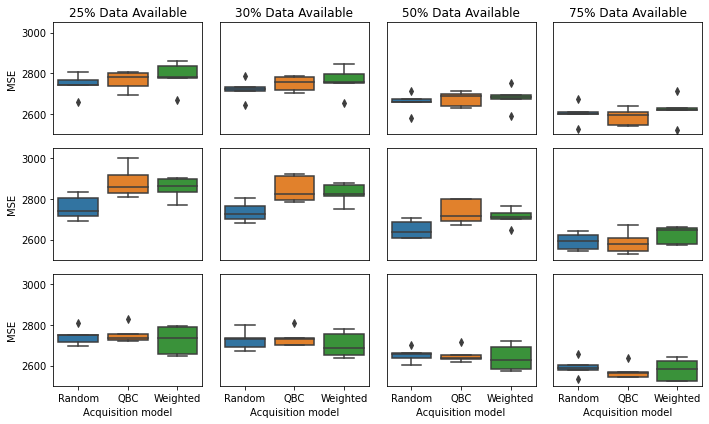

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(10, 6))
pct_opts = [(.25, "25"), (.30, "30"), (.50, "50"), (.75, "75")]
init_modes = ['uniform', 'user_subset', 'item_subset']
for i, init_mode in enumerate(init_modes):
    expmt = '20000_0.1_1_0.5_0.5_' + init_mode + '_uniform_0.0_30_False_1000_5'
    data = pd.concat([pd.read_csv('./results/ml-20m-tiny/Weighted/' + expmt + '/results_df'),
                      pd.read_csv('./results/ml-20m-tiny/Random/' + expmt + '/results_df'),
                      pd.read_csv('./results/ml-20m-tiny/QBC/' + expmt + '/results_df')])
    for j, pct_opt in enumerate(pct_opts):
        pct_available, pct_str = pct_opt        
        data_one_m = data[(data['pct_available'] > pct_available - .02) & (data['pct_available'] < pct_available + .02)]
        sns.boxplot(x='acq_model', y='micro_mse',  data=data_one_m, ax = ax[i][j], order=['Random', 'QBC', 'Weighted'])
        if i == 0:
            ax[i][j].set_title(pct_str + "% Data Available")

        if i == 2:
            ax[i][j].set_xlabel("Acquisition model")
        else:
            ax[i][j].set_xlabel("")
            ax[i][j].set_xticks([])
        if j == 0:
            ax[i][j].set_ylabel("MSE")
            #ax[i][j].set_yticks([.25, .50, .75])
            #ax[i][j].set_yticks([7300, 7750, 8200])
            ax[i][j].set_yticks([2600, 2800, 3000])
        else:
            ax[i][j].set_yticks([])
            ax[i][j].set_ylabel("")
        ax[i][j].set_ylim(2500, 3050)
plt.tight_layout()

In [47]:
pct_available = .5
init_mode = 'user_subset'
expmt = '20000_0.1_1_0.5_0.5_' + init_mode + '_uniform_0.0_30_False_1000_5'
data = pd.concat([pd.read_csv('./results/ml-20m-tiny/Weighted/' + expmt + '/results_df'),
                  pd.read_csv('./results/ml-20m-tiny/Random/' + expmt + '/results_df'),
                  pd.read_csv('./results/ml-20m-tiny/QBC/' + expmt + '/results_df')])
data[(data['pct_available'] > pct_available - .02) & (data['pct_available'] < pct_available + .02)]

,Unnamed: 0,dataset,acq_model,micro_mse,micro_pct,macro_mse,quantity_cost,run,n_available,pct_available,mc_model
9,9,<dataset.MovieLensDataset object at 0x7ff33843...,Weighted,2709.735481,0.633288,-1,15978.9651,0,12093,0.488725,FunkSVD
29,29,<dataset.MovieLensDataset object at 0x7ff2fd4d...,Weighted,2701.653460,0.640113,-1,15682.7451,1,12093,0.488725,FunkSVD
49,49,<dataset.MovieLensDataset object at 0x7ff2fd81...,Weighted,2732.095380,0.637328,-1,14752.2251,2,12093,0.488725,FunkSVD
69,69,<dataset.MovieLensDataset object at 0x7ff30670...,Weighted,2767.365073,0.474457,-1,16962.9651,3,12093,0.488725,FunkSVD
89,89,<dataset.MovieLensDataset object at 0x7ff33875...,Weighted,2645.855752,0.616465,-1,16250.4251,4,12093,0.488725,FunkSVD
9,9,<dataset.MovieLensDataset object at 0x7ff33843...,Random,2707.807708,0.771008,-1,11671.4851,0,12093,0.488725,FunkSVD
29,29,<dataset.MovieLensDataset object at 0x7ff329cc...,Random,2607.916767,0.762972,-1,10978.0451,1,12093,0.488725,FunkSVD
49,49,<dataset.MovieLensDataset object at 0x7ff30670...,Random,2605.859439,0.759365,-1,11080.6251,2,12093,0.488725,FunkSVD
69,69,<dataset.MovieLensDataset object at 0x7ff2fd4d...,Random,2639.576318,0.776301,-1,10611.1451,3,12093,0.488725,FunkSVD
89,89,<dataset.MovieLensDataset object at 0x7ff33875...,Random,2686.854702,0.729336,-1,11863.8651,4,12093,0.488725,FunkSVD
